# I] Import functions and options

In [7]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [8]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [9]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [10]:
path = output_file_directory + "ATG7/TCGA_GTEX/all_filtered_tissues/"

# II] Data download

In [11]:
path2 = 'dataframes_for_input/'

In [12]:
%%time
# DL data ATG7 isoform expression
path2 = 'dataframes_for_input/'
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_filtered.csv', sep = ",")
df_ATG7_Primary = pandas.read_csv(path+path2+'df_ATG7_Primary_filtered.csv', sep = ",")

#remove Survival information
dfs = df_ATG7_Normal, df_ATG7_Primary
for df in dfs:
    df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
print(df_ATG7_Primary.shape)
df_ATG7_Normal.head(2)

(3753, 17)
(5300, 17)
Wall time: 45.8 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_tpm,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.558498,2.996009,2.021477,0.879716,22.563767,6.977902,3.059994,0.840013,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.364710,3.132488,2.210724,0.963466,19.601965,7.769460,3.629077,0.949989,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


In [43]:
print(len(df_ATG7_Normal['Primary_Site'].value_counts()))
print(len(df_ATG7_Primary['Primary_Site'].value_counts()))

15
15


In [36]:
#create df with the two groups
df_ATG7_NormPrim = pandas.concat([df_ATG7_Normal, df_ATG7_Primary], axis=0)
print(df_ATG7_NormPrim.shape)
df_ATG7_NormPrim.head(2)

(9053, 17)


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_tpm,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.558498,2.996009,2.021477,0.879716,22.563767,6.977902,3.059994,0.840013,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.364710,3.132488,2.210724,0.963466,19.601965,7.769460,3.629077,0.949989,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


# III] ATG7 expression

In [12]:
path2 = 'figs_ATG7_characterisation/'

## A) ATG7 expression

### a. Log2 tpm+1

In [13]:
#Verification of no values are negative
columns = 'ATG7', 'ATG7_1', 'ATG7_2'
for column in columns:
    print(df_ATG7_Normal[column].min())

1.5508689224250372
1.2690226149569193
0.0


In [14]:
df_ATG7_NormPrim.head(2)

,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_tpm,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.558498,2.996009,2.021477,0.879716,22.563767,6.977902,3.059994,0.840013,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615
1,GTEX-U4B1-0126-SM-4DXSN,Normal Tissue,Adrenal Gland,4.364710,3.132488,2.210724,0.963466,19.601965,7.769460,3.629077,0.949989,12.348525,62.918120,29.388745,7.693134,0.396361,0.185138


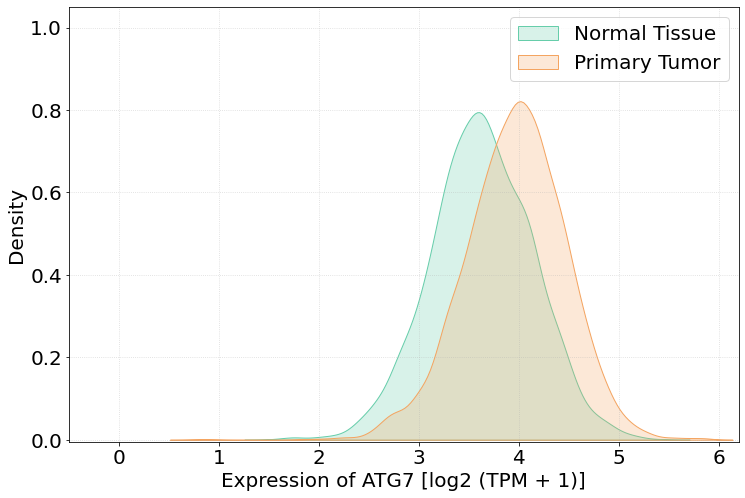

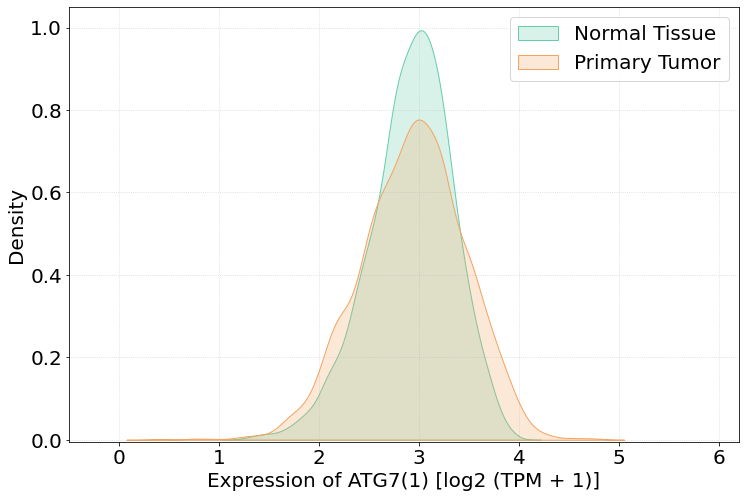

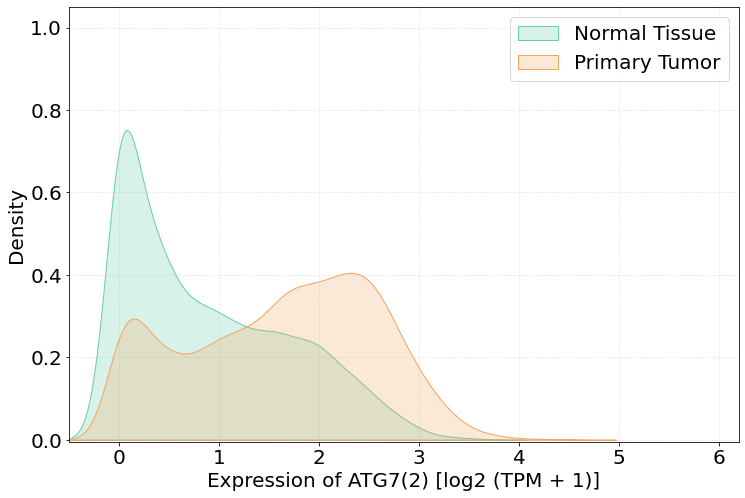

<Figure size 864x576 with 0 Axes>

In [24]:
# Distribution graph, for ATG7, iso1 & iso2
## LOG2(TPM+1) + Density
isoforms = 'ATG7', 'ATG7_1', 'ATG7_2'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    xData = df_ATG7_Normal[isoform]
    x2Data = df_ATG7_Primary[isoform]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('Expression of '+ isoforms_info[i] + ' [log2 (TPM + 1)]')
    plt.xlim(-0.5, 6.2)
    plt.ylim(-0.005, 1.05)
#     plt.title(isoforms_info[i]+ ' expression ')
    plt.legend(labels=["Normal Tissue","Primary Tumor"])
    title_file = 'distrib_' + isoforms_info[i]
    
    plt.savefig(path+path2+title_file+'.svg')
    plt.show()
    plt.clf()

## B) Percentage do not express ATG7 isoforms

In [31]:
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = 'all normal tissue', 'all primary tumor'
isoforms = 'ATG7_tpm', 'ATG7_1tpm', 'ATG7_2tpm', 'ATG7_3tpm'
iso_names = 'ATG7', 'ATG7(1)', 'ATG7(2)', 'ATG7(3)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())
    
    for j in range(len(isoforms)):
        isoform = isoforms[j]
        iso_name = iso_names[j]

        all_ = (df[isoform]).shape
        no_exp = (df[isoform]<0.1).sum()
        perc_no_exp = (no_exp*100)/all_
        perc_no_exp = float(perc_no_exp)
        print(round(perc_no_exp,1),'% of tumor do not express', iso_name)

    print()

ALL NORMAL TISSUE
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
24.2 % of tumor do not express ATG7(2)
60.2 % of tumor do not express ATG7(3)

ALL PRIMARY TUMOR
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
8.5 % of tumor do not express ATG7(2)
28.2 % of tumor do not express ATG7(3)



In [34]:
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = 'all normal tissue', 'all primary tumor'
isoforms = 'ATG7_tpm', 'ATG7_1tpm', 'ATG7_2tpm', 'ATG7_3tpm'
iso_names = 'ATG7', 'ATG7(1)', 'ATG7(2)', 'ATG7(3)'

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
      
    print(info.upper())
    
    for j in range(len(isoforms)):
        isoform = isoforms[j]
        iso_name = iso_names[j]

        #save what isoform
        what.append(isoform)
        #save sample_type
        sample_type.append(info)
        #have total sample number
        all_ = (df[isoform]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[isoform]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

#create a dictionnary and convert to dataframe
d = dict(Isoforms = what, who_dontexp = who_dontexp, 
         Percentage = perc_noexp, Sample_Type = sample_type)
df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib

ALL NORMAL TISSUE
ALL PRIMARY TUMOR


,Isoforms,who_dontexp,Percentage,Sample_Type
0,ATG7_tpm,0,0,all normal tissue
1,ATG7_1tpm,0,0,all normal tissue
2,ATG7_2tpm,910,24.2,all normal tissue
3,ATG7_3tpm,2260,60.2,all normal tissue
4,ATG7_tpm,0,0,all primary tumor
5,ATG7_1tpm,0,0,all primary tumor
6,ATG7_2tpm,450,8.5,all primary tumor
7,ATG7_3tpm,1492,28.2,all primary tumor


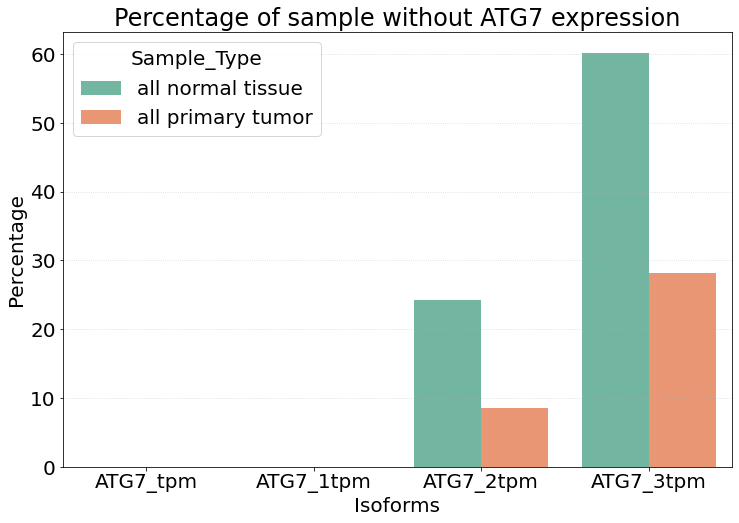

In [40]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", hue="Sample_Type", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without ATG7 expression")
plt.yticks(fontsize=20)


plt.savefig(path+path2+'percentage_expression.svg')

In [ ]:
#LET SEE PER TISSUE ?

## C) Expression figures

### 1) Value TPM

(9053, 4)
shape after df transformation: (27159, 3)

      Sample_Type  isoforms      value
0  Normal Tissue  ATG7_tpm  22.563767
1  Normal Tissue  ATG7_tpm  19.601965
2  Normal Tissue  ATG7_tpm  19.305303
3  Normal Tissue  ATG7_tpm  18.686478
4  Normal Tissue  ATG7_tpm  18.608921


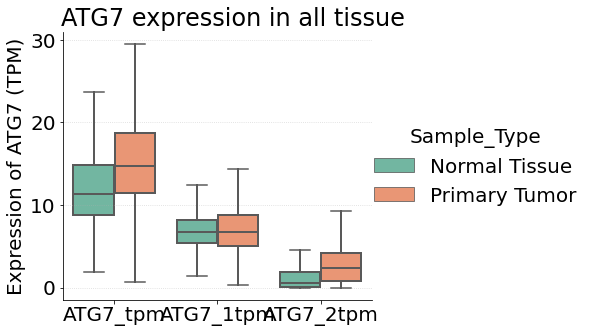

In [41]:
# Distribution: Data preparation + graph
data = df_ATG7_NormPrim[['Sample_Type','ATG7_tpm', 'ATG7_1tpm', 'ATG7_2tpm']]
info = 'all tissue'

print(data.shape)

#transform the DF to only have values in an unique column
data = data.melt(id_vars=["Sample_Type"], var_name="isoforms")
print(f'shape after df transformation: {data.shape}')
print('\n', data.head())

seaborn.catplot(data = data, x="isoforms", y="value", hue="Sample_Type", aspect= 1.2, kind="box", palette = 'Set2',
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of ATG7 (TPM)')
plt.xlabel('')
plt.title('ATG7 expression in '+ info, x=.55)

#save
plt.savefig(path+path2+'ATG7_exp_alltissue.svg')

In [42]:
#Verification everything is correct
#median from brut file:
print('brut file:')
isoforms = 'ATG7_tpm', 'ATG7_1tpm', 'ATG7_2tpm'
for isoform in isoforms:
    print(df_ATG7_NormPrim[isoform].median())

#median after modification:
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
print('------------\nafter modification:')                     
for isoform in isoforms:
    print(data[data['isoforms'] == isoform].median())

brut file:
13.268112733031067
6.749526369040142
1.4700028074304168
------------
after modification:
Sample_Type   NaN
isoforms      NaN
value         NaN
dtype: float64
value    6.749526
dtype: float64
value    1.470003
dtype: float64


In [43]:
#Distribution: Stats for all 
isoforms = 'ATG7_tpm', 'ATG7_1tpm', 'ATG7_2tpm'
iso_names = 'ATG7', 'ATG7(1)', 'ATG7(2)'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    iso_name = iso_names[i]

    n1 = "{:.3f}".format(df_ATG7_Normal[isoform].median())
    n2 = "{:.3f}".format(df_ATG7_Primary[isoform].median())

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ATG7_Normal[isoform], df_ATG7_Primary[isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue between normal tissue ({n1}) and primary tumor ({n2}) for {iso_name} is {Pvalue}')
print()

pvalue between normal tissue (11.328) and primary tumor (14.783) for ATG7 is 2.366E-192
pvalue between normal tissue (6.731) and primary tumor (6.759) for ATG7(1) is 4.052E-02
pvalue between normal tissue (0.610) and primary tumor (2.330) for ATG7(2) is 7.439E-279



### 2) Normalized

(9053, 3)
shape after df transformation: (18106, 3)

      Sample_Type    isoforms     value
0  Normal Tissue  ATG7_1norm  0.309253
1  Normal Tissue  ATG7_1norm  0.396361
2  Normal Tissue  ATG7_1norm  0.376540
3  Normal Tissue  ATG7_1norm  0.458155
4  Normal Tissue  ATG7_1norm  0.413767


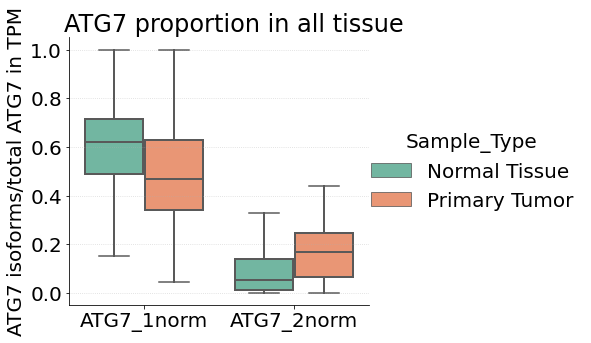

In [44]:
# Distribution: Data preparation + graph
data = df_ATG7_NormPrim[['Sample_Type','ATG7_1norm', 'ATG7_2norm']]
info = 'all tissue'

print(data.shape)

#transform the DF to only have values in an unique column
data = data.melt(id_vars=["Sample_Type"], var_name="isoforms")
print(f'shape after df transformation: {data.shape}')
print('\n', data.head())

seaborn.catplot(data = data, x="isoforms", y="value", hue="Sample_Type", aspect= 1.2, kind="box", palette = 'Set2',
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ATG7 isoforms/total ATG7 in TPM')
plt.xlabel('')
plt.title('ATG7 proportion in '+ info, x=0.55)

#save graph
plt.savefig(path+path2+'prop_alltissue.svg')

In [45]:
#Verification everything is correct
#median from brut file:
print('brut file:')
isoforms = 'ATG7_1norm', 'ATG7_2norm'
for isoform in isoforms:
    print(df_ATG7_NormPrim[isoform].median())

#median after modification:
isoforms = 'ATG7_1norm', 'ATG7_2norm'
print('------------\nafter modification:')                     
for isoform in isoforms:
    print(data[data['isoforms'] == isoform].median())

brut file:
0.5380902370405279
0.11683311161704645
------------
after modification:
value    0.53809
dtype: float64
value    0.116833
dtype: float64


In [46]:
#Distribution: Stats for all 
isoforms = 'ATG7_1norm', 'ATG7_2norm'
iso_names = 'ATG7(1)/total ATG7', 'ATG7(2)/total ATG7'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    iso_name = iso_names[i]

    n1 = "{:.3f}".format(df_ATG7_Normal[isoform].median())
    n2 = "{:.3f}".format(df_ATG7_Primary[isoform].median())

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ATG7_Normal[isoform], df_ATG7_Primary[isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue between normal tissue ({n1}) and primary tumor ({n2}) for {iso_name} is {Pvalue}')
print()

pvalue between normal tissue (0.619) and primary tumor (0.466) for ATG7(1)/total ATG7 is 1.933E-180
pvalue between normal tissue (0.055) and primary tumor (0.170) for ATG7(2)/total ATG7 is 2.724E-262



## D) Correlation between the two isoforms

In [47]:
#Remove the 0.5% extremities to have a nicer graph
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = "Normal tissue", "Primary tumor"
isoforms = 'ATG7_1', 'ATG7_2'
df_final = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    isoform = isoforms[i]

    #Remove 0.5% extremities
    df_no_extrem = []
    for isoform in isoforms:
        print(info, ':', df.shape)
        #sort by value, 
        for_isoforms = df.sort_values([isoform], ascending = False)
        print(isoform)
        
        #remove the extremities
        lenght = len(for_isoforms)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extremities = for_isoforms.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extremities.shape)
        print()
        df_no_extrem.append(df_no_extremities)
        
    #drop the unfiltered column ATG7_2 ([0]) and replace it with the filtered one ([1]) 
    df_no_extrem[0].pop("ATG7_2")
    #add column ATG7_2 (filtered one) at the correct position
    df_no_extrem[0].insert(5, "ATG7_2", df_no_extrem[1]['ATG7_2'])
    #remove NaN (the deleted samples for the two isoform)
    df = df_no_extrem[0].dropna(axis=0)
    df_final.append(df)
    print('df_final after merge of the two filtered columns:', df.shape)
    print('________________________')
    #now, need to compute the two isoform with sample name.

Normal tissue : (3753, 17)
ATG7_1
 18 are removed from head and tail
 without extremities: (3717, 17)

Normal tissue : (3753, 17)
ATG7_2
 18 are removed from head and tail
 without extremities: (3717, 17)

df_final after merge of the two filtered columns: (3681, 17)
________________________
Primary tumor : (5300, 17)
ATG7_1
 26 are removed from head and tail
 without extremities: (5248, 17)

Primary tumor : (5300, 17)
ATG7_2
 26 are removed from head and tail
 without extremities: (5248, 17)

df_final after merge of the two filtered columns: (5197, 17)
________________________


The correlation between iso1 and iso2 in Normal tissue is: 0.015637551148320772 0.34288237043811864


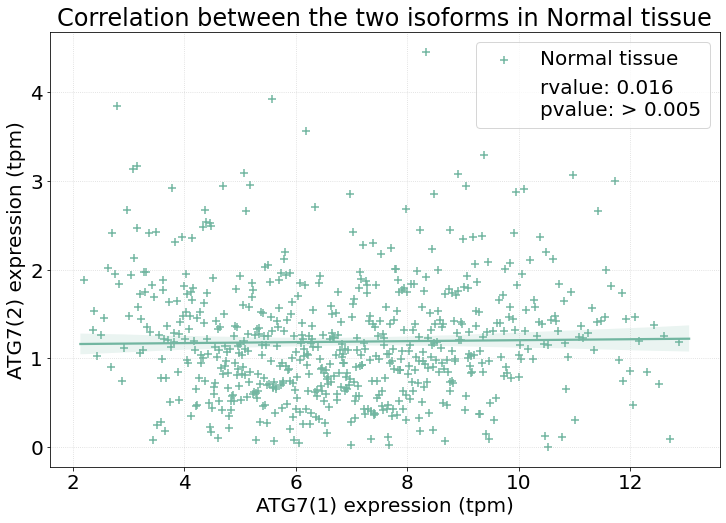


The correlation between iso1 and iso2 in Primary tumor is: -0.21664912418134313 2.987140482595137e-56


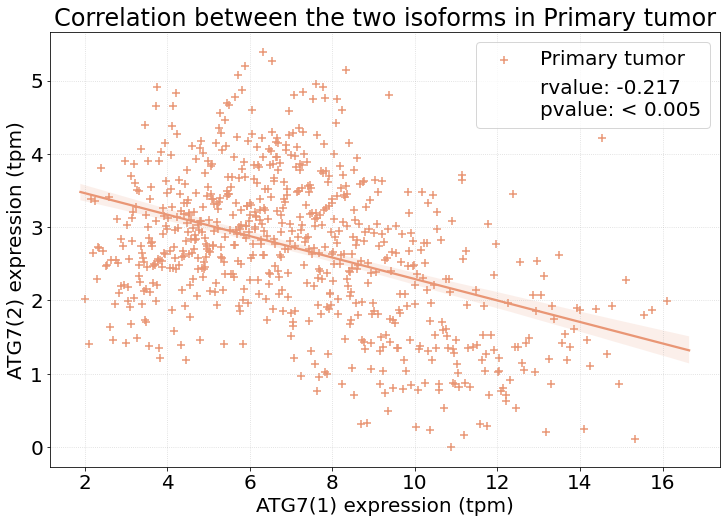

<Figure size 864x576 with 0 Axes>

In [48]:
#Graph and stats_ spearman correlation
#graph
color1 = '#72B6A1'
color2 = '#e99675'

dfs = df_final[0], df_final[1] 
infos = "Normal tissue", "Primary tumor"
p_texts = '> 0.005', '< 0.005'
colors = color1, color2

for i in range(len(dfs)):  
    df = dfs[i]
    info = infos[i]
    p_text = p_texts[i]
    color = colors[i]
    
    x = df['ATG7_1tpm'].to_list()
    y = df['ATG7_2tpm'].to_list()    
    
    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print("The correlation between iso1 and iso2 in", info, "is:", r_value, p_value)
    
    #graph
    seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+", label = info, color = color)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue: "+str(p_text))

    name = "Correlation between the two isoforms in " + info
    plt.title(name)
    plt.xlabel("ATG7(1) expression (tpm)")
    plt.ylabel('ATG7(2) expression (tpm)')

    plt.legend()

    #save
    title_file = 'ATG7s_corr_tpm_' + info
    plt.savefig(path+path2+title_file+'.svg')

    plt.show()  
    plt.clf()
    print()